Calcul du modèle tensoriel (peut prendre quelques secondes)...
Dimension de la slice de vecteurs : (81, 106, 3)


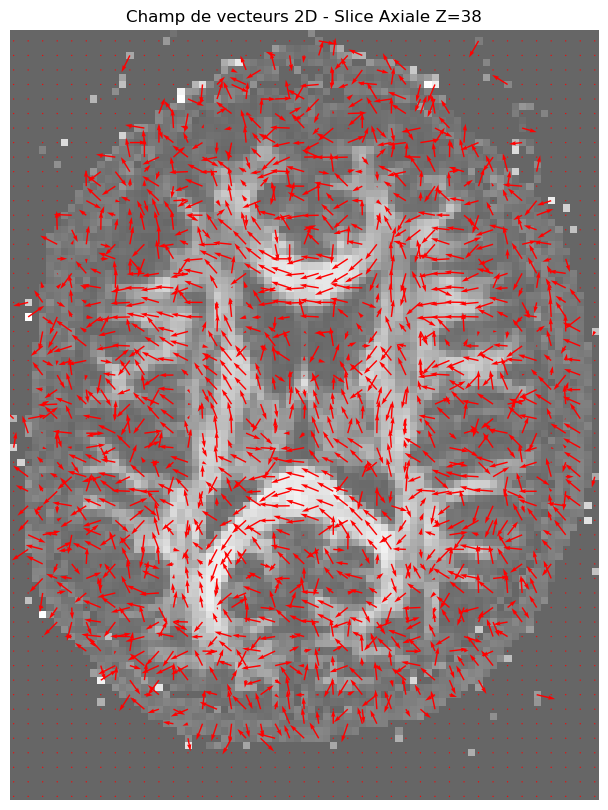

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from dipy.data import fetch_stanford_hardi, read_stanford_hardi
from dipy.reconst.dti import TensorModel

# 1. Charger les données (Volume 3D)
fetch_stanford_hardi()
img, gtab = read_stanford_hardi()
data = img.get_fdata()

# 2. Ajuster le modèle DTI pour avoir les vecteurs
# (On limite le calcul à une bounding box pour aller plus vite, ou on fait tout)
print("Calcul du modèle tensoriel (peut prendre quelques secondes)...")
tenmodel = TensorModel(gtab)
tenfit = tenmodel.fit(data, mask=data[..., 0] > 50)

# 3. EXTRACTION DE LA SLICE 2D
# La forme des données est (X, Y, Z, Directions)
# On choisit une coupe axiale au milieu (axe Z)
z_slice_index = data.shape[2] // 2

# Récupération des vecteurs propres principaux (V1) pour cette slice
# Shape résultante : (X, Y, 3) -> Une grille 2D où chaque pixel contient un vecteur (x,y,z)
slice_vectors = tenfit.evecs[:, :, z_slice_index, 0]

# Récupération de la "Fractional Anisotropy" (FA) pour le fond
slice_fa = tenfit.fa[:, :, z_slice_index]

print(f"Dimension de la slice de vecteurs : {slice_vectors.shape}")
# Exemple: (81, 106, 3) -> Image 81x106 pixels, avec 3 composantes par pixel

# 4. Visualisation (Quiver Plot / Champ de vecteurs)
plt.figure(figsize=(10, 10))

# On affiche la carte FA en fond (niveaux de gris)
plt.imshow(slice_fa.T, cmap='gray', origin='lower', alpha=0.6)

# On superpose les vecteurs (on sous-échantillonne pour la lisibilité : steps de 2)
x, y = np.meshgrid(np.arange(slice_vectors.shape[0]),
                   np.arange(slice_vectors.shape[1]), indexing='ij')

# Attention : pour l'affichage 2D, on projette souvent les composantes X et Y du vecteur
plt.quiver(x[::2, ::2], y[::2, ::2],
           slice_vectors[::2, ::2, 0],  # Composante X du vecteur
           slice_vectors[::2, ::2, 1],  # Composante Y du vecteur
           color='red', scale=30, headwidth=3)

plt.title(f"Champ de vecteurs 2D - Slice Axiale Z={z_slice_index}")
plt.axis('off')
plt.show()